#  <center>SUPERVISED LEARNING</center>

In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Libraries imported and ready for data preprocessing and modeling
libraries_imported = True
libraries_imported


True

In [15]:
import pandas as pd 
# Load the datasets separately
drug_df = pd.read_csv('Drug.csv')
covid_df = pd.read_csv('Covid.csv')

# Display the first few rows of each dataframe to understand their structure
drug_df_head = drug_df.head()
covid_df_head = covid_df.head()

drug_df_head, covid_df_head


(                   INDICATOR                     PANEL  PANEL_NUM  \
 0  Drug overdose death rates  All drug overdose deaths          0   
 1  Drug overdose death rates  All drug overdose deaths          0   
 2  Drug overdose death rates  All drug overdose deaths          0   
 3  Drug overdose death rates  All drug overdose deaths          0   
 4  Drug overdose death rates  All drug overdose deaths          0   
 
                                                 UNIT  UNIT_NUM STUB_NAME  \
 0  Deaths per 100,000 resident population, age-ad...         1     Total   
 1  Deaths per 100,000 resident population, age-ad...         1     Total   
 2  Deaths per 100,000 resident population, age-ad...         1     Total   
 3  Deaths per 100,000 resident population, age-ad...         1     Total   
 4  Deaths per 100,000 resident population, age-ad...         1     Total   
 
    STUB_NAME_NUM   STUB_LABEL  STUB_LABEL_NUM  YEAR  YEAR_NUM       AGE  \
 0              0  All persons        

In [43]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

# Load the dataset
df = pd.read_csv('Covid.csv')

# Handle missing values (if any)
df = df.dropna()

# Encode categorical variables
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    df[column] = label_encoders[column].fit_transform(df[column])

# Discretize vaccination rates into categories (e.g., low, medium, high)
df['vaccination_category'] = pd.qcut(df['Vaccinated Rate'], q=3, labels=['low', 'medium', 'high'])

# Separate features and target variable
X = df.drop(columns=['Vaccinated Rate', 'vaccination_category'])
y = df['vaccination_category']

# Normalize/standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Initialize models
knn = KNeighborsClassifier()
svm = SVC()
dt = DecisionTreeClassifier()
lr = LogisticRegression()

# Train and evaluate KNN
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
acc_knn = accuracy_score(y_test, y_pred_knn)
cm_knn = confusion_matrix(y_test, y_pred_knn)

# Train and evaluate SVM
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
acc_svm = accuracy_score(y_test, y_pred_svm)
cm_svm = confusion_matrix(y_test, y_pred_svm)

# Train and evaluate Decision Tree
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
acc_dt = accuracy_score(y_test, y_pred_dt)
cm_dt = confusion_matrix(y_test, y_pred_dt)

# Train and evaluate Logistic Regression
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
acc_lr = accuracy_score(y_test, y_pred_lr)
cm_lr = confusion_matrix(y_test, y_pred_lr)

# Display results
print(f"KNN Accuracy: {acc_knn}\nConfusion Matrix:\n{cm_knn}\n")
print(f"SVM Accuracy: {acc_svm}\nConfusion Matrix:\n{cm_svm}\n")
print(f"Decision Tree Accuracy: {acc_dt}\nConfusion Matrix:\n{cm_dt}\n")
print(f"Logistic Regression Accuracy: {acc_lr}\nConfusion Matrix:\n{cm_lr}\n")


KNN Accuracy: 0.7906976744186046
Confusion Matrix:
[[19  0  6]
 [ 1 23  7]
 [ 0  4 26]]

SVM Accuracy: 0.6976744186046512
Confusion Matrix:
[[17  0  8]
 [ 2 13 16]
 [ 0  0 30]]

Decision Tree Accuracy: 0.9883720930232558
Confusion Matrix:
[[25  0  0]
 [ 0 31  0]
 [ 0  1 29]]

Logistic Regression Accuracy: 0.7441860465116279
Confusion Matrix:
[[21  0  4]
 [ 0 22  9]
 [ 1  8 21]]



({'KNN Accuracy': 0.7906976744186046,
  'SVM Accuracy': 0.6976744186046512,
  'Decision Tree Accuracy': 0.9883720930232558,
  'Logistic Regression Accuracy': 0.7441860465116279},
 array([[19,  0,  6],
        [ 1, 23,  7],
        [ 0,  4, 26]]),
 array([[17,  0,  8],
        [ 2, 13, 16],
        [ 0,  0, 30]]),
 array([[25,  0,  0],
        [ 0, 31,  0],
        [ 0,  1, 29]]),
 array([[21,  0,  4],
        [ 0, 22,  9],
        [ 1,  8, 21]]))

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import ConfusionMatrixDisplay

# Function to plot confusion matrix
def plot_confusion_matrix(cm, model_name):
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['low', 'medium', 'high'])
    disp.plot(cmap='Blues')
    plt.title(f'Confusion Matrix for {model_name}')
    plt.show()

# Plot confusion matrices
plot_confusion_matrix(cm_knn, "KNN")


In [54]:
#SVM Plot 
plot_confusion_matrix(cm_svm, "SVM")

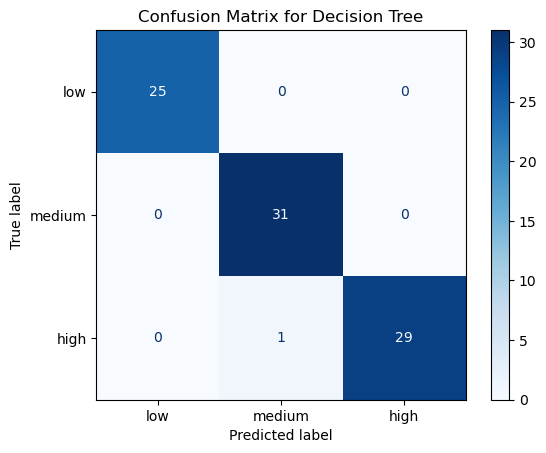

In [56]:
#Decsion Tree Plot
plot_confusion_matrix(cm_dt, "Decision Tree")


In [58]:
#Logistic Regression
plot_confusion_matrix(cm_lr, "Logistic Regression")

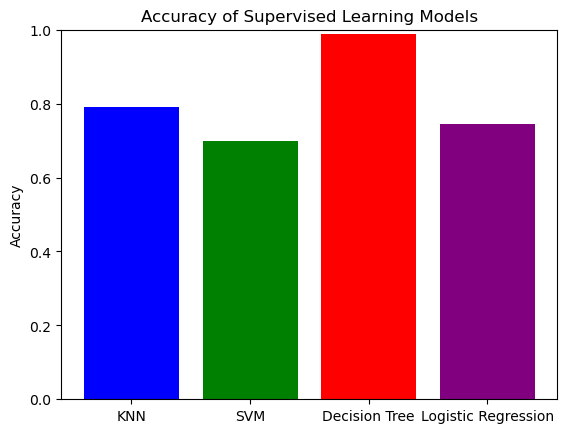

In [64]:
import matplotlib.pyplot as plt

# Accuracy results for each model
model_accuracies = {
    "KNN": acc_knn,
    "SVM": acc_svm,
    "Decision Tree": acc_dt,
    "Logistic Regression": acc_lr
}

# Plotting the bar chart
fig, ax = plt.subplots()
ax.bar(model_accuracies.keys(), model_accuracies.values(), color=['blue', 'green', 'red', 'purple'])
ax.set_ylabel('Accuracy')
ax.set_title('Accuracy of Supervised Learning Models')
plt.ylim([0, 1])

# Display the plot
plt.show()


#  <center>UNSUPERVISED LEARNING</center>

In [69]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer

# Load the dataset
drug_df = pd.read_csv('Drug.csv')

# Handle missing values
imputer = SimpleImputer(strategy='most_frequent')
drug_df_imputed = pd.DataFrame(imputer.fit_transform(drug_df), columns=drug_df.columns)

# Encode categorical variables
label_encoders = {}
for column in drug_df_imputed.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    drug_df_imputed[column] = label_encoders[column].fit_transform(drug_df_imputed[column])

# Normalize/standardize features
scaler = StandardScaler()
drug_df_scaled = pd.DataFrame(scaler.fit_transform(drug_df_imputed), columns=drug_df_imputed.columns)

drug_df_scaled.head()


INDICATOR    PANEL  PANEL_NUM      UNIT  UNIT_NUM  STUB_NAME  \
0        0.0 -1.46385   -1.46385 -1.170411 -1.170411   2.367783   
1        0.0 -1.46385   -1.46385 -1.170411 -1.170411   2.367783   
2        0.0 -1.46385   -1.46385 -1.170411 -1.170411   2.367783   
3        0.0 -1.46385   -1.46385 -1.170411 -1.170411   2.367783   
4        0.0 -1.46385   -1.46385 -1.170411 -1.170411   2.367783   

   STUB_NAME_NUM  STUB_LABEL  STUB_LABEL_NUM      YEAR  YEAR_NUM       AGE  \
0      -2.093345   -1.093111        -1.61649 -1.652363 -1.652363  0.726413   
1      -2.093345   -1.093111        -1.61649 -1.481395 -1.481395  0.726413   
2      -2.093345   -1.093111        -1.61649 -1.310426 -1.310426  0.726413   
3      -2.093345   -1.093111        -1.61649 -1.139458 -1.139458  0.726413   
4      -2.093345   -1.093111        -1.61649 -0.968490 -0.968490  0.726413   

    AGE_NUM  ESTIMATE  FLAG  
0 -0.834838  0.393578   0.0  
1 -0.834838  0.411235   0.0  
2 -0.834838  0.517179   0.0  
3 -0.834838  0.764381   0.0  
4 -0.834838  0.887982   0.0

In [75]:
# Sample a subset of the data for quicker computation
drug_df_sampled = drug_df_scaled.sample(n=1000, random_state=42)

# Determine the optimal number of clusters using the Elbow method
inertia = []
for n in range(1, 11):
    kmeans = KMeans(n_clusters=n, random_state=42)
    kmeans.fit(drug_df_sampled)
    inertia.append(kmeans.inertia_)

# Plot the Elbow method results
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method For Optimal Number of Clusters')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()


/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/

In [85]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Drug dataset
drug_df = pd.read_csv('Drug.csv')

# Handle missing values using imputation
imputer = SimpleImputer(strategy='most_frequent')
drug_df_imputed = pd.DataFrame(imputer.fit_transform(drug_df), columns=drug_df.columns)

# Encode categorical variables
label_encoders = {}
for column in drug_df_imputed.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    drug_df_imputed[column] = label_encoders[column].fit_transform(drug_df_imputed[column])

# Separate features (assuming 'ESTIMATE' is the target and should be excluded from features)
X_drug = drug_df_imputed.drop(columns=['ESTIMATE'])

# Normalize/standardize features
scaler = StandardScaler()
X_drug_scaled = scaler.fit_transform(X_drug)

# Choose the number of clusters (k)
k = 3  # Example choice, you may experiment with different values

# Apply K-means clustering
kmeans_drug = KMeans(n_clusters=k, random_state=42)
clusters_drug = kmeans_drug.fit_predict(X_drug_scaled)

# Add cluster labels to the original dataframe
drug_df_imputed['Cluster'] = clusters_drug

# Evaluate clustering using silhouette score
silhouette_avg_drug = silhouette_score(X_drug_scaled, clusters_drug)
print(f'Silhouette Score for k={k}: {silhouette_avg_drug}')

# Visualize the clusters
plt.figure(figsize=(10, 7))
sns.scatterplot(x=X_drug_scaled[:, 0], y=X_drug_scaled[:, 1], hue=clusters_drug, palette='viridis', s=100, alpha=0.7)
plt.title(f'K-means Clustering on Drug Dataset with k={k}')
plt.xlabel('Feature 1 (Standardized)')
plt.ylabel('Feature 2 (Standardized)')
plt.legend(title='Cluster')
plt.show()

# Analyze the characteristics of each cluster
cluster_analysis = drug_df_imputed.groupby('Cluster').mean()

# Display the cluster characteristics
print(cluster_analysis)


/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score for k=3: 0.28659610835052096


         INDICATOR  PANEL  PANEL_NUM      UNIT  UNIT_NUM  STUB_NAME  \
Cluster                                                               
0              0.0    2.5        2.5  0.666667  0.666667   2.444444   
1              0.0    2.5        2.5  0.000000  0.000000   4.169312   
2              0.0    2.5        2.5  1.000000  1.000000   1.333333   

         STUB_NAME_NUM  STUB_LABEL  STUB_LABEL_NUM      YEAR  YEAR_NUM  \
Cluster                                                                  
0             1.666667   24.666667        8.444444  9.500000  9.500000   
1             4.560847   33.309524       38.563492  9.952381  9.952381   
2             2.333333   17.166667       15.833333  9.500000  9.500000   

              AGE   AGE_NUM   ESTIMATE  FLAG  
Cluster                                       
0        8.333333  0.333333  31.138889   0.0  
1        8.000000  0.000000  35.895503   0.0  
2        3.500000  5.500000  43.765972   0.0  
